# Code for Lecture 2: data manipulation and visualization

We begin by loading the various libraries that we'll use, and setting the plotting parameters

In [1]:
library(plyr)
library(tidyverse)
library(scales)
library(nycflights13)

# set a simple black & white theme for our plots
theme_set(theme_bw())

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::summarize() masks plyr::summarize()


Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




## Daily volume of flights

We start by preparing the data, computing the total number of flights on each day in February.

In [2]:
plot_data <- flights %>%
  filter(month == 2) %>%
  mutate(date=as.Date(paste(year, month, day, sep='-'))) %>%
  group_by(date) %>%
  summarize(n=n())

head(plot_data)

date,n
<date>,<int>
2013-02-01,926
2013-02-02,682
2013-02-03,814
2013-02-04,932
2013-02-05,896
2013-02-06,901


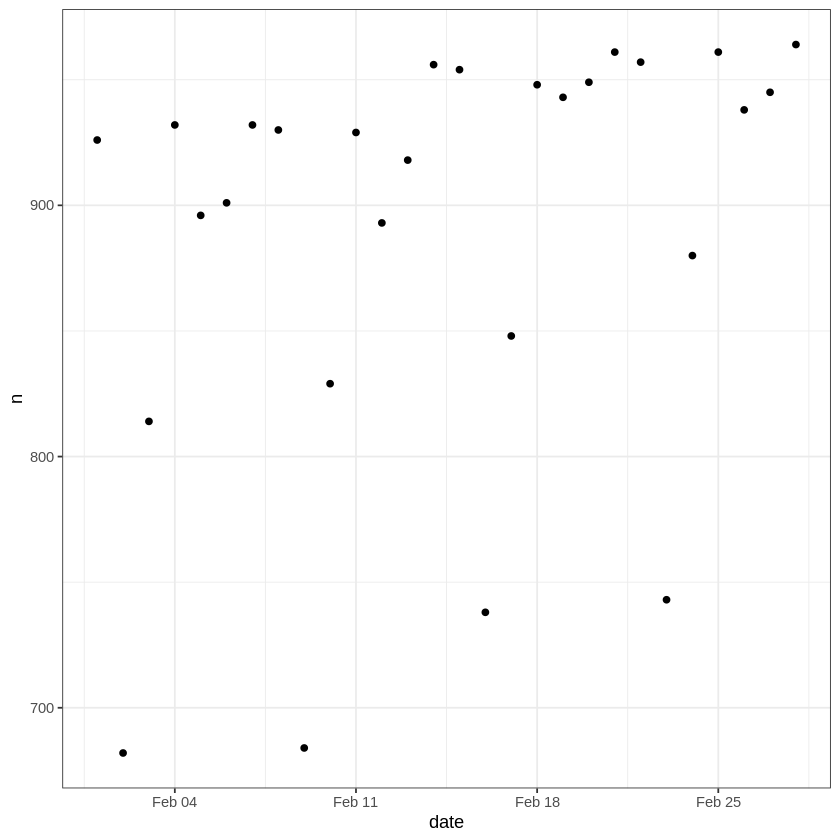

In [3]:
# default scatterplot
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point()

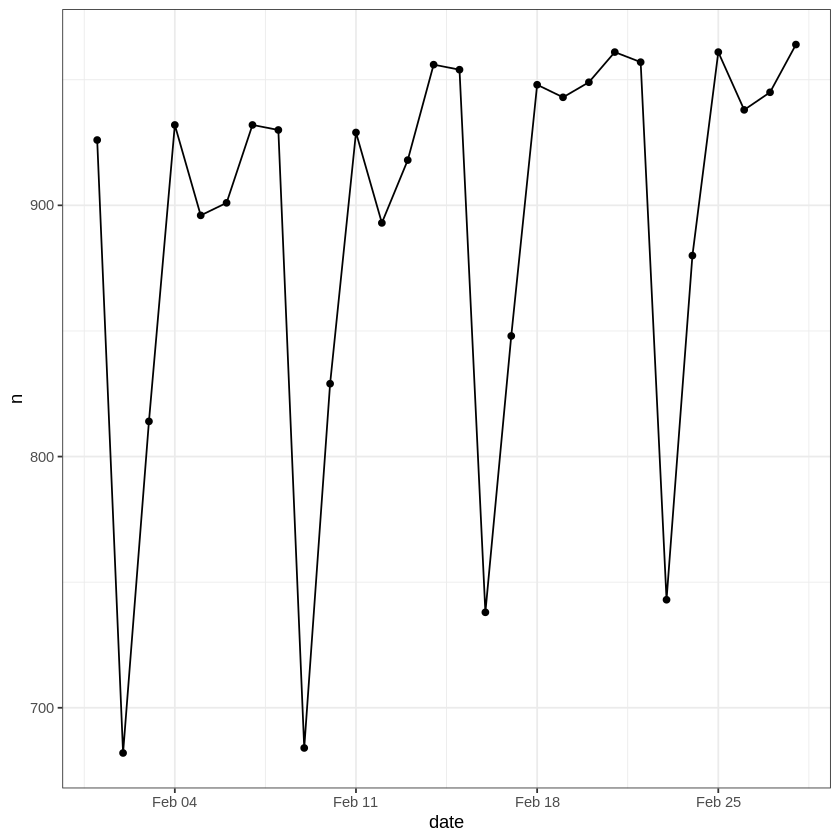

In [4]:
# connect the points with lines
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point() +
  geom_line()

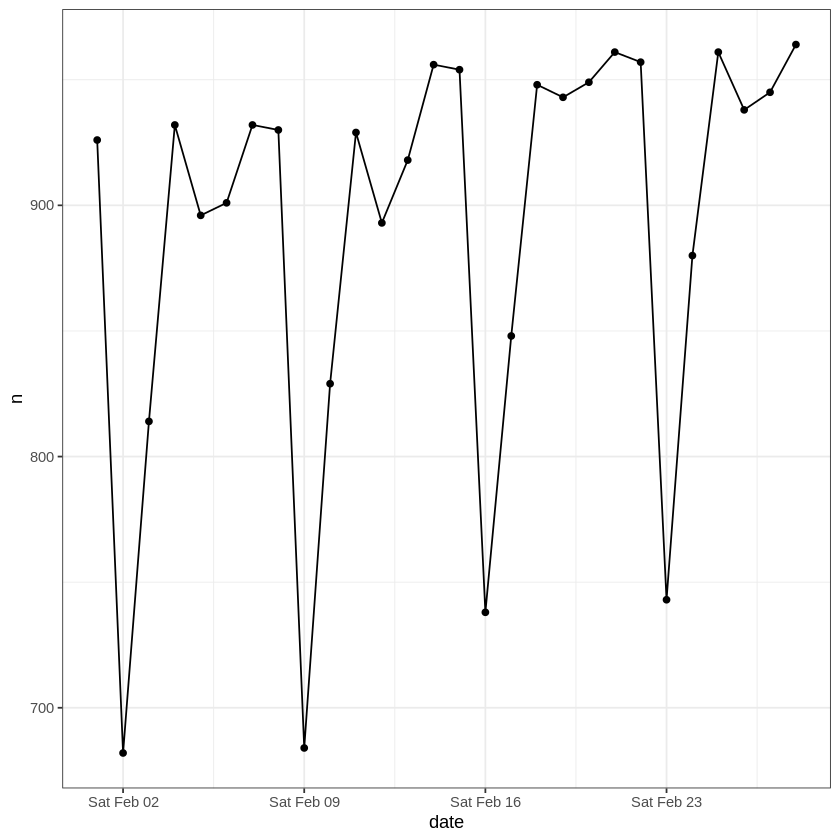

In [5]:
# compute the saturdays
saturdays <- plot_data %>%
  filter(strftime(date, format='%u') == 6) %>%
  select(date)

# plot with saturdays marked
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point() +
  geom_line() +
  scale_x_date(breaks=saturdays$date, date_label='%a %b %d')

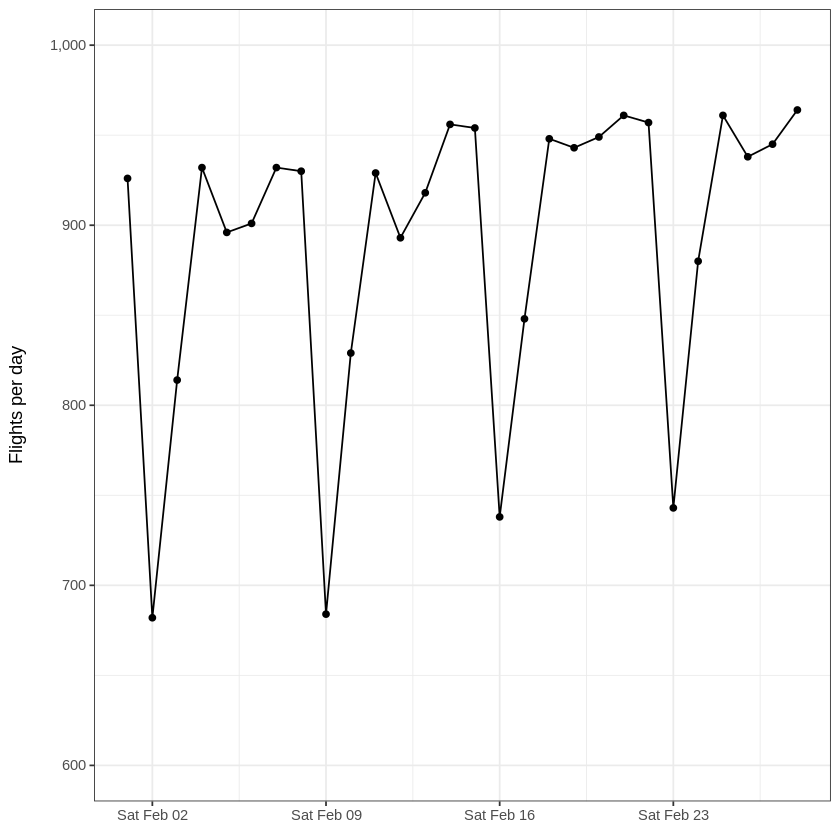

In [6]:
ggplot(data=plot_data, aes(x=date, y=n)) +
  geom_point() +
  geom_line() +
  scale_x_date(element_blank(), breaks=saturdays$date, date_label='%a %b %d') +
  scale_y_continuous("Flights per day\n", limits=c(600, 1000), labels=comma)

## Intergenerational Mobility

In [2]:
# inspired from https://www.youtube.com/watch?v=fSgEeI2Xpdc

library(tidyverse)
library(patchwork)

# from https://onlinelibrary.wiley.com/doi/epdf/10.3982/ECTA17018
alesina <-
    tribble(
        ~country, ~mean, ~districts, ~median,   ~sd,  ~min,  ~max,
        "South Africa",  0.79,        216,     0.8, 0.075, 0.555, 0.896,
        "Botswana",   0.7,         23,   0.714, 0.079, 0.554, 0.909,
        "Zmbabwe",  0.63,         88,   0.726, 0.148,   0.4,     1,
        "Nigeria",  0.64,         37,   0.765, 0.201,  0.33, 0.963,
        "Egypt",  0.65,        236,   0.694, 0.105, 0.418, 0.914,
        "Tanzania",   0.6,        113,   0.611, 0.094, 0.408, 0.854,
        "Ghana",  0.58,        110,    0.65, 0.158, 0.181,  0.82,
        "Cameroon",  0.52,        230,   0.588, 0.203, 0.088, 0.896,
        "Kenya",  0.45,        173,   0.514, 0.187, 0.048, 0.873,
        "Zambia",  0.49,         72,   0.467, 0.127, 0.284, 0.785,
        "Morocco",  0.43,         59,   0.424, 0.145,  0.16, 0.723,
        "Lesotho",  0.44,         10,   0.437,  0.06, 0.317, 0.492,
        "Uganda",  0.37,        161,   0.382, 0.128, 0.015, 0.696,
        "Benin",  0.41,         77,   0.381, 0.132, 0.111, 0.649,
        "Rwanda",  0.29,         30,    0.28, 0.063,  0.22, 0.469,
        "Senegal",  0.29,         34,   0.209, 0.164, 0.078, 0.616,
        "Sierra Leone",  0.26,        107,   0.185, 0.149, 0.032, 0.694,
        "Ethiopia",  0.13,         97,   0.119, 0.235,     0, 0.865,
        "Malawi",  0.16,        227,   0.163, 0.115, 0.052, 0.643,
        "Liberia",  0.22,         47,    0.18,  0.08, 0.034, 0.345,
        "Guinea",  0.23,         34,   0.179, 0.085, 0.063, 0.491,
        "Sudan",  0.11,        129,   0.097, 0.144, 0.001, 0.551,
        "Mali",  0.21,        242,   0.128, 0.096, 0.013, 0.578,
        "Burkina Faso",  0.17,         45,   0.123,  0.08, 0.029, 0.526,
        "Mozambique",   0.1,        144,   0.064, 0.086, 0.015, 0.707,
        "South Sudan",  0.04,         72,   0.024, 0.056,     0, 0.319
    )

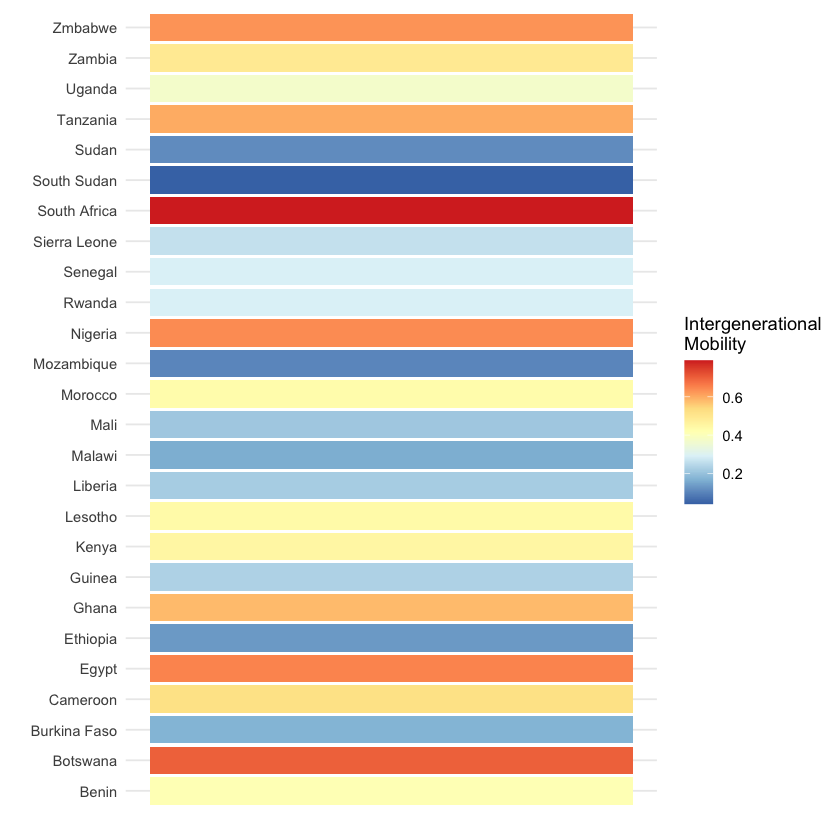

In [19]:
gg_hue_1 <- ggplot(alesina,
                   aes(x = country,
                       y = 1,
                       fill  = mean)) +
    geom_col() +
    scale_fill_distiller(name = "Intergenerational\nMobility", palette = "RdYlBu") +
    scale_y_continuous(labels = NULL, breaks = NULL)  +
    theme_minimal()  +
    labs(x = "", y = "") +
    coord_flip()
gg_hue_1

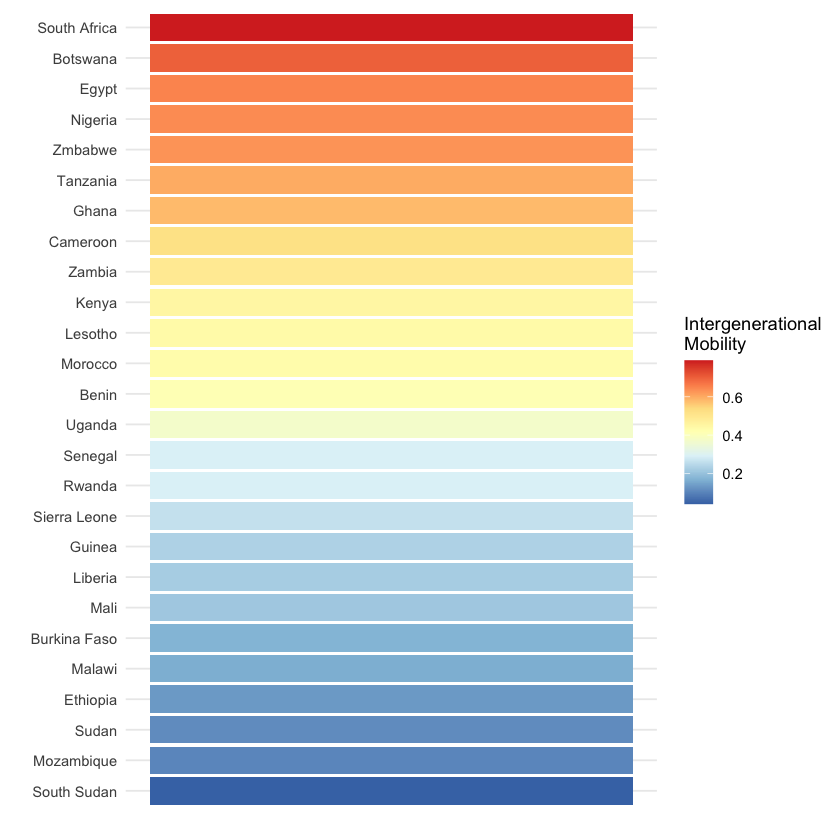

In [21]:
# hue, sorted
gg_hue_2 <- gg_hue_1 + aes(x = fct_reorder(country, mean)) +
    labs(x = "", y = "")
gg_hue_2

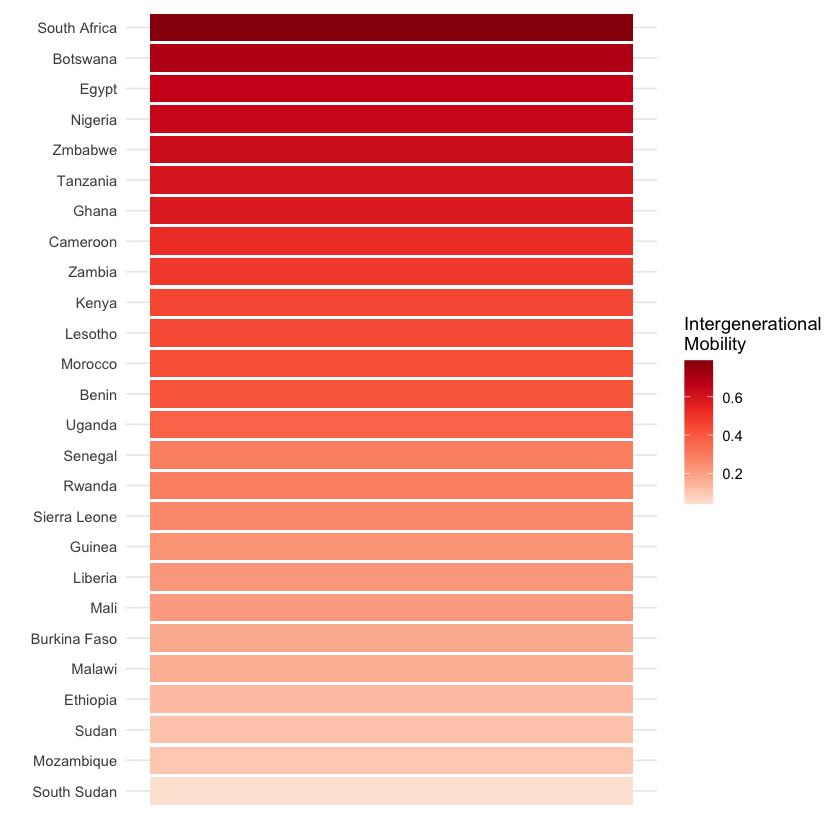

In [22]:
# shade
gg_hue_3 <- ggplot(alesina,
                   aes(x = fct_reorder(country, mean),
                       y = 1,
                       fill  = mean)) +
    geom_col() +
    scale_fill_distiller(name = "Intergenerational\nMobility", palette = "Reds", direction = 1) +
    scale_y_continuous(labels = NULL, breaks = NULL)  +
    theme_minimal()  +
    labs(x = "", y = "") +
    coord_flip()
gg_hue_3

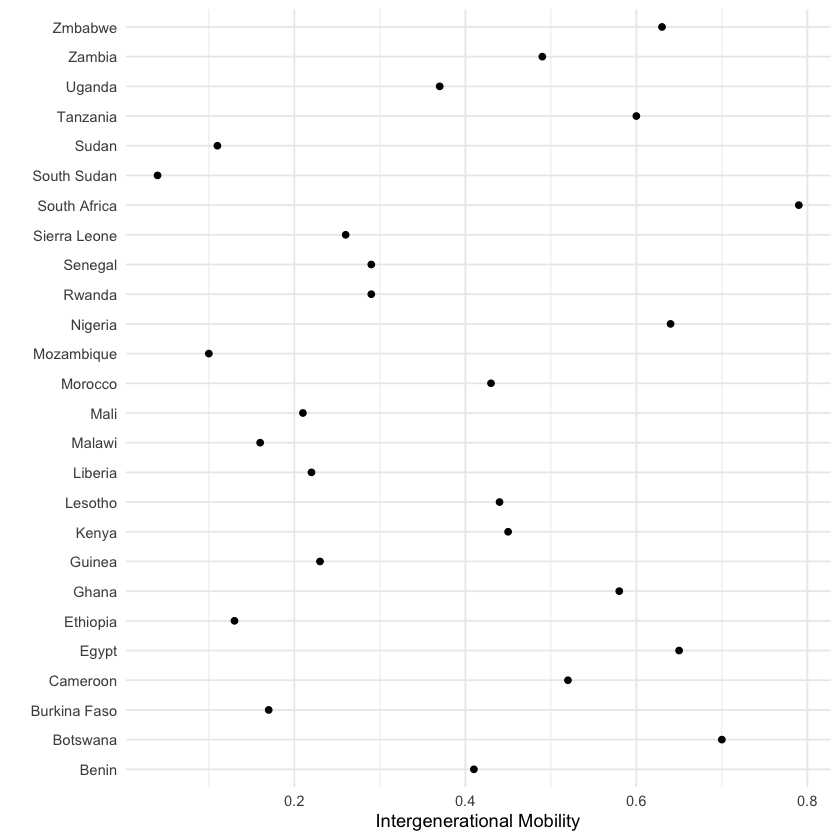

In [32]:
gg_num_1 <- ggplot(alesina,
                   aes(x = country,
                       y = mean)) +
    geom_point() +
    theme_minimal()  +
    labs(x = "", y = "Intergenerational Mobility") +
    coord_flip()
gg_num_1

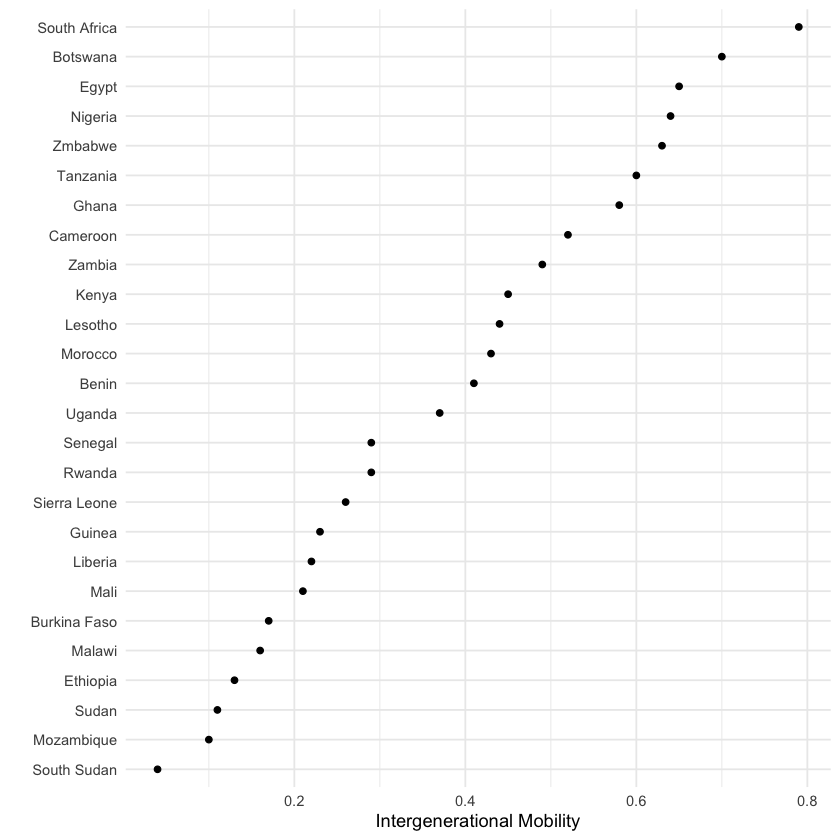

In [30]:
gg_num_2 <- ggplot(alesina,
                   aes(x = fct_reorder(country,  mean),
                       y = mean)) +
    geom_point() +
    theme_minimal()  +
    labs(x = "", y = "Intergenerational Mobility") +
    coord_flip()
gg_num_2

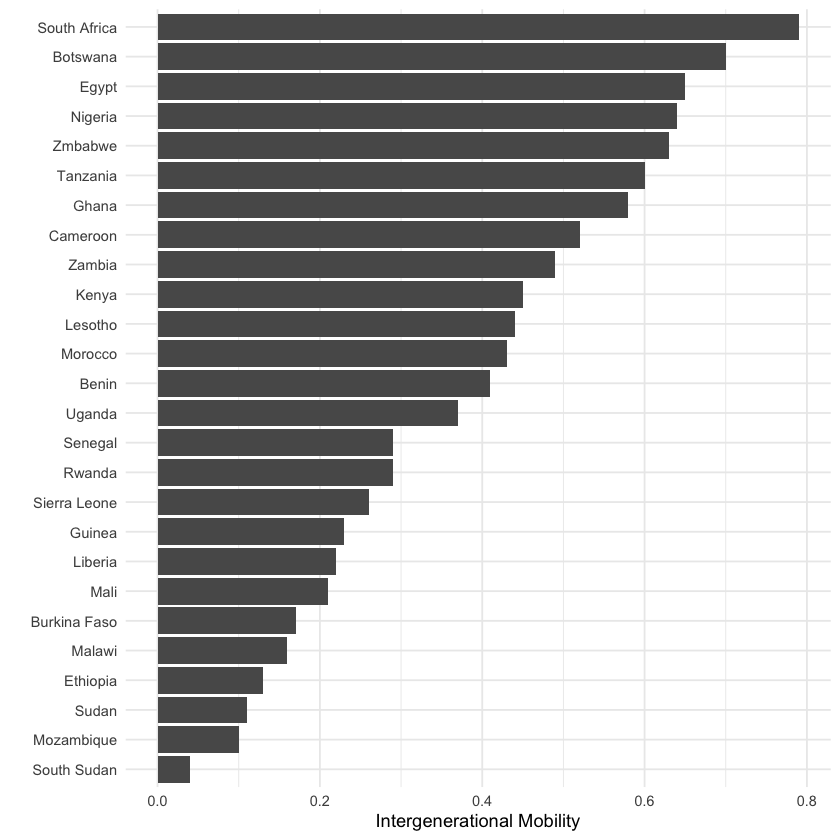

In [31]:
# numeric
gg_num_3 <- ggplot(alesina,
                   aes(x = fct_reorder(country,  mean),
                       y = mean)) +
    geom_col() +
    theme_minimal()  +
    labs(x = "", y = "Intergenerational Mobility") +
    coord_flip()
gg_num_3

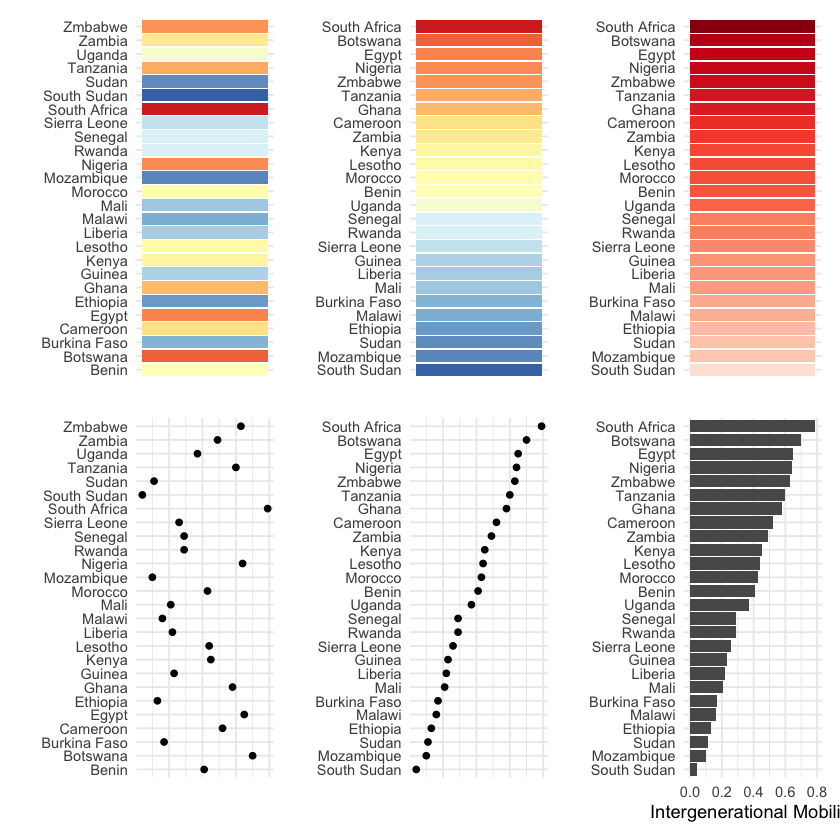

In [37]:
# all together
gg_hue_1 + guides(fill = "none") +
    gg_hue_2 + guides(fill = "none") +
    gg_hue_3 + guides(fill = "none") +
    gg_num_1 + scale_y_continuous(labels = NULL, name  = NULL) +
    gg_num_2 + scale_y_continuous(labels = NULL, name  = NULL) +
    gg_num_3 +
    plot_layout(nrow = 2)

## Stop-and-frisk

In [7]:
load('../data/sqf.Rdata')

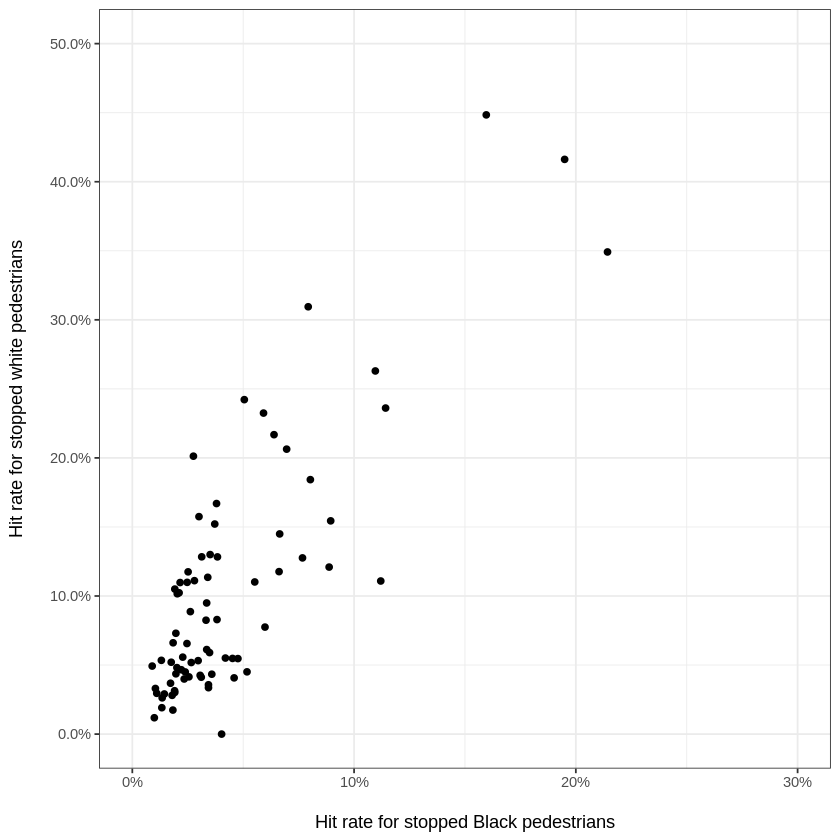

In [8]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('\nHit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .3)) +
  scale_y_continuous('Hit rate for stopped white pedestrians\n',
                     labels=percent, limits=c(0, .5))

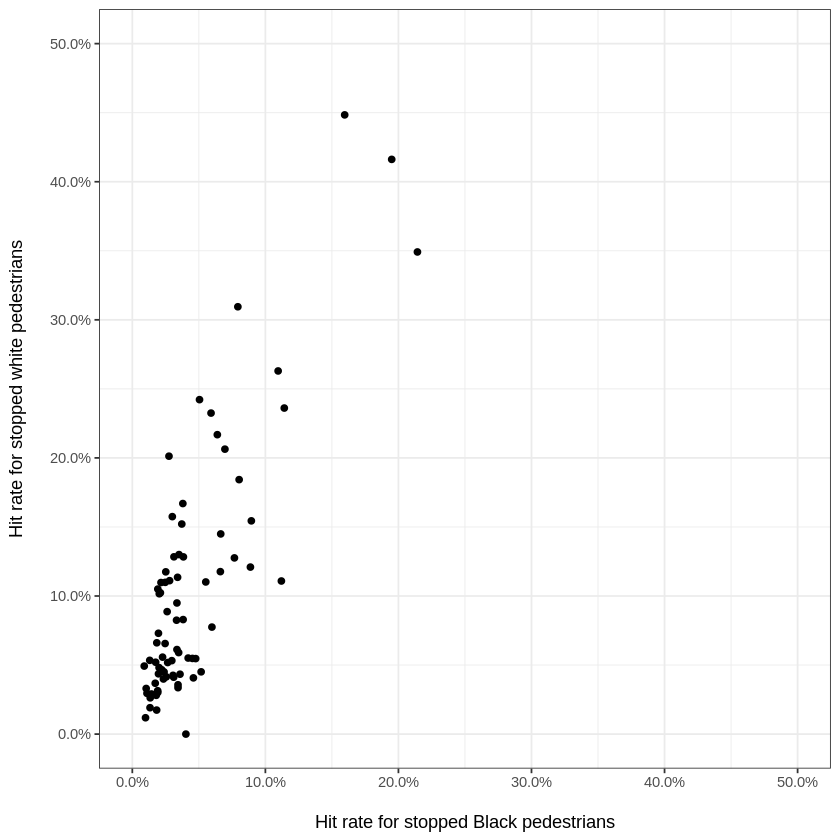

In [9]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  scale_x_continuous('\nHit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians\n',
                     labels=percent, limits=c(0, .5))

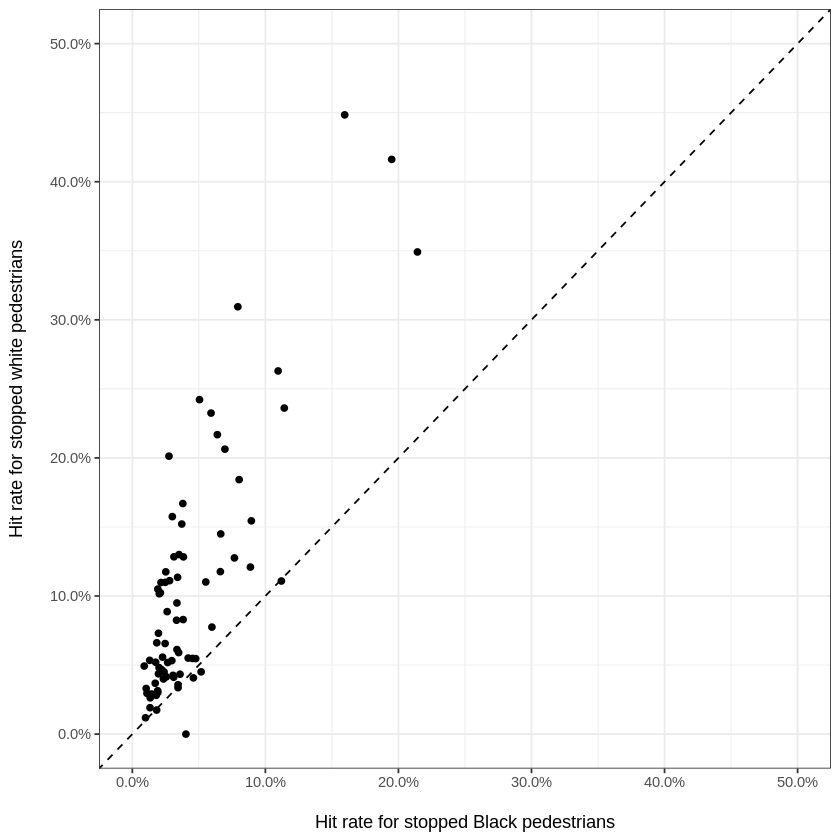

In [10]:
ggplot(data=hitrate_by_precinct, aes(x=black, y=white)) +
  geom_point() +
  geom_abline(slope=1, intercept=0, linetype='dashed') +
  scale_x_continuous('\nHit rate for stopped Black pedestrians',
                     labels=percent, limits=c(0, .5)) +
  scale_y_continuous('Hit rate for stopped white pedestrians\n',
                     labels=percent, limits=c(0, .5))